# Wordart example notebook
Prototyping text source lookup via various API's and word cloud rendering with added features. Will eventually be a webapp most likely. 

[color lookup](https://matplotlib.org/examples/color/colormaps_reference.html)

## Imports

In [1]:
import requests
import json
import numpy as np
import math
import time
import pandas as pd
import nltk
from matplotlib import pyplot as plt
import os

from IPython.display import display

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

from PIL import Image, ImageOps, ImageEnhance
from wordcloud import WordCloud, STOPWORDS

from requests_oauthlib import OAuth1

In [2]:
%run words_api.py
%run words_visualization.py

## Pull in secret keys

In [3]:
private_data = json.loads(open('private_data.json').read())
nyt_key = private_data['nytimes-api-key']
twitter_auth_dict = private_data['twitter-auth']

## Fetch some NYT data

In [5]:
# sf bay
reader_sf = NYTReader(nyt_key)
reader_sf.get_search_term(search='headline:("San Francisco", "Oakland", "Silicon Valley")', 
                             begin_date='20010101',
                             article_limit=200, 
                             verbose=True)

Request failed, only got 130 docs
Got 130 docs, from 2003-10-07T00:00:00Z to 2017-10-12T20:27:23+0000


## Testing words from different types of sources
This example only prints proper nouns. Base class dict `WordsAPI.pos` contains different types of parts of speech to use

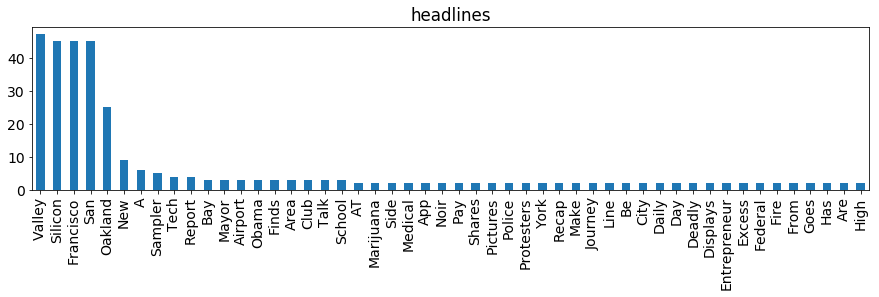

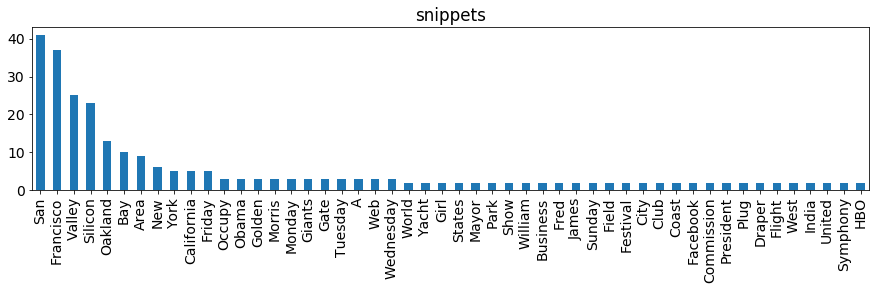

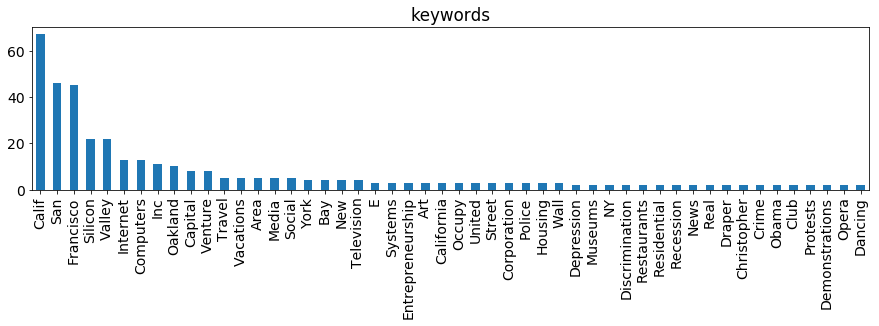

In [6]:
reader = reader_sf
for source in reader.text_sources.keys():
    reader.plot_top_words(df=reader.df_from_text([source]), n=50, title=source, 
                      pos_list=reader.pos['include'], exclude=False, print_tuple=False)

## Build word list (optional)
This method will return a list of words of the specified parts of speech

In [7]:
text_words = reader.get_words(source_list=['headlines', 'snippets'], pos_list=None, exclude=False)

print('%d total words, %d unique words' % (len(text_words), len(set(text_words))))

4143 total words, 1826 unique words


## Make wordcloud image

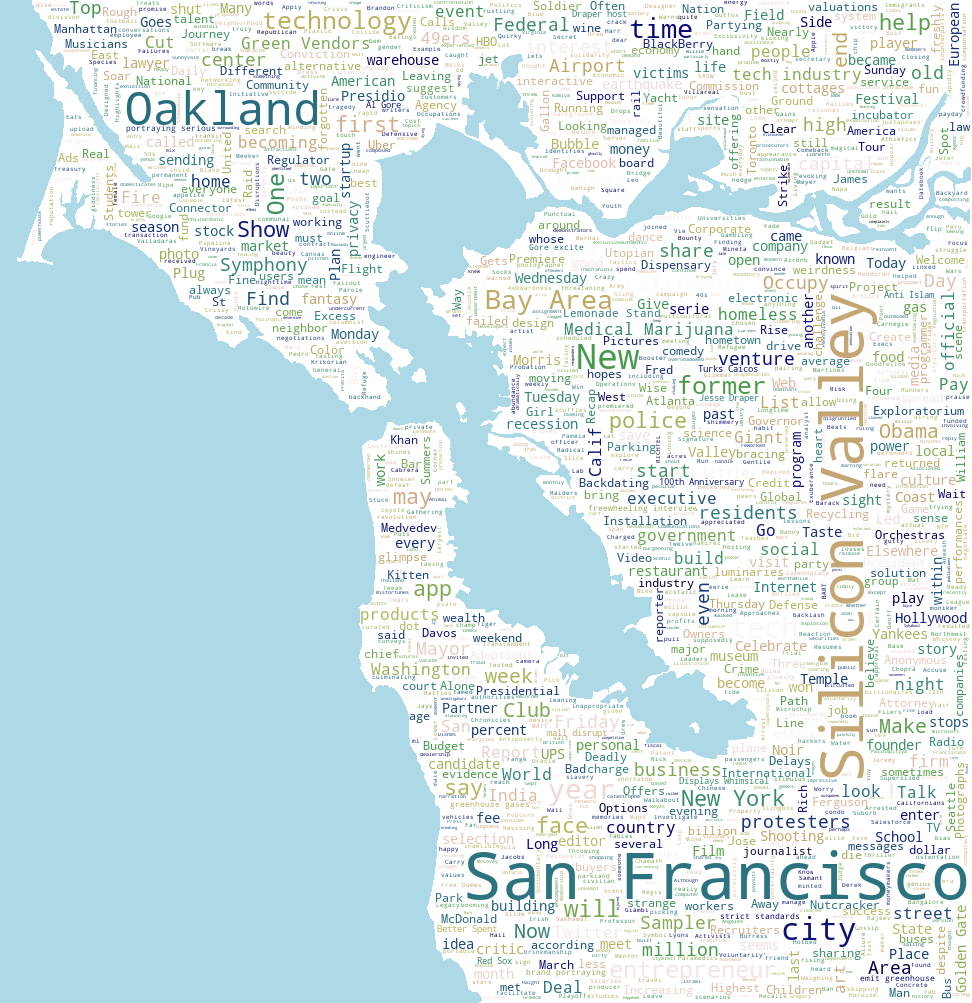

In [8]:
# get list of text sources
text_list = reader_sf.build_list_from_sources(source_list=['headlines','snippets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/Location_Map_San_Francisco_Bay_Area_edited.gif')

wa.make_wordcloud(text=text_list, image=image,
               filename="final images/sf_bay.png", 
               colormap='gist_earth', background='lightblue')

## Make some more from different NYT searches

Request failed, only got 150 docs
Got 150 docs, from 1860-01-23T00:03:58Z to 2015-11-12T01:43:28Z


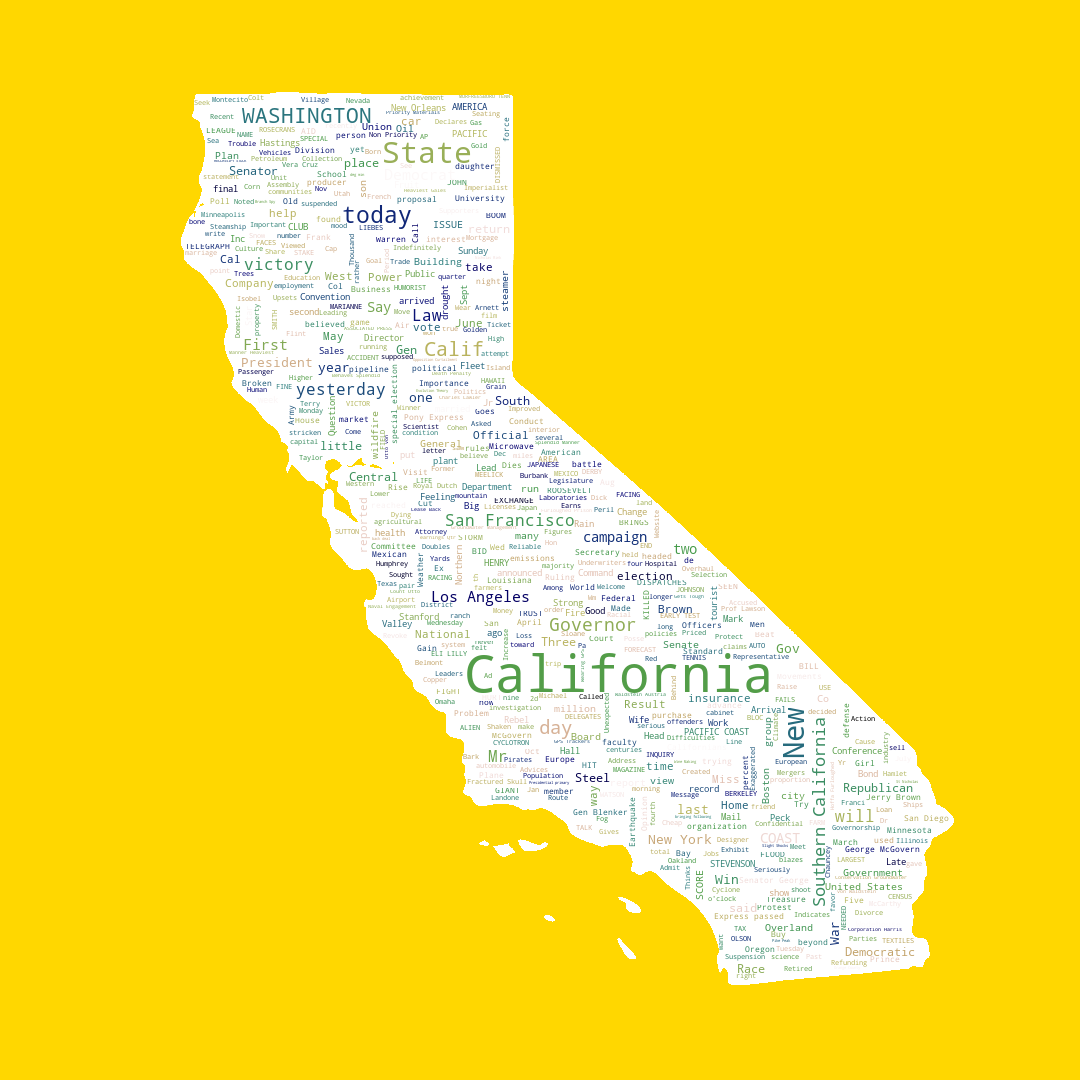

In [9]:
# california
reader_ca = NYTReader(nyt_key)
reader_ca.get_search_term(search='headline:("California")', 
                             article_limit=200,
                             verbose=True)

# get list of text sources
text_list = reader_ca.build_list_from_sources(source_list=['headlines','snippets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/kalifornien_schwarz.png', transparency=True)

wa.make_wordcloud(text=text_list, image=image,
               filename="final images/ca.png", 
               colormap='gist_earth', background='gold')

Request failed, only got 90 docs
Got 90 docs, from 2001-06-26T00:00:00Z to 2017-09-09T21:36:13+0000


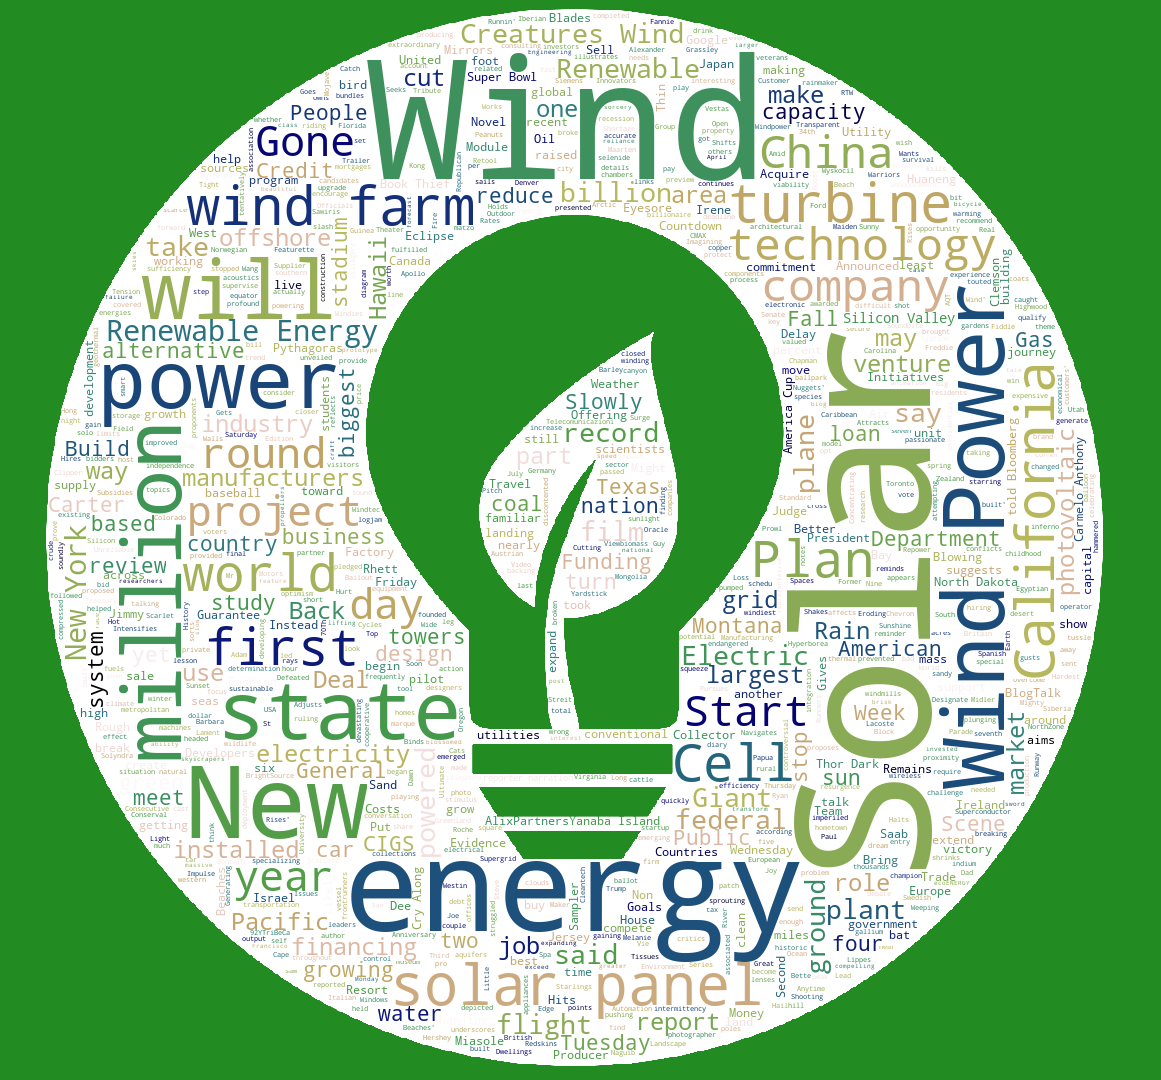

In [10]:
# renewable energy
reader_green = NYTReader(nyt_key)
reader_green.get_search_term(search='headline:("Solar", "Wind", "Renewable")', 
                                begin_date='20010101',
                                article_limit=200,
                                verbose=True)

# get list of text sources
text_list = reader_green.build_list_from_sources(source_list=['headlines','snippets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/Renewable-Energy-Consultants.png', transparency=True)

wa.make_wordcloud(text=text_list, image=image,
               filename="final images/green.png",
               colormap='gist_earth', background='forestgreen')


Got 20 docs, from 1946-10-08T00:00:00Z to 2015-01-01T07:11:58Z


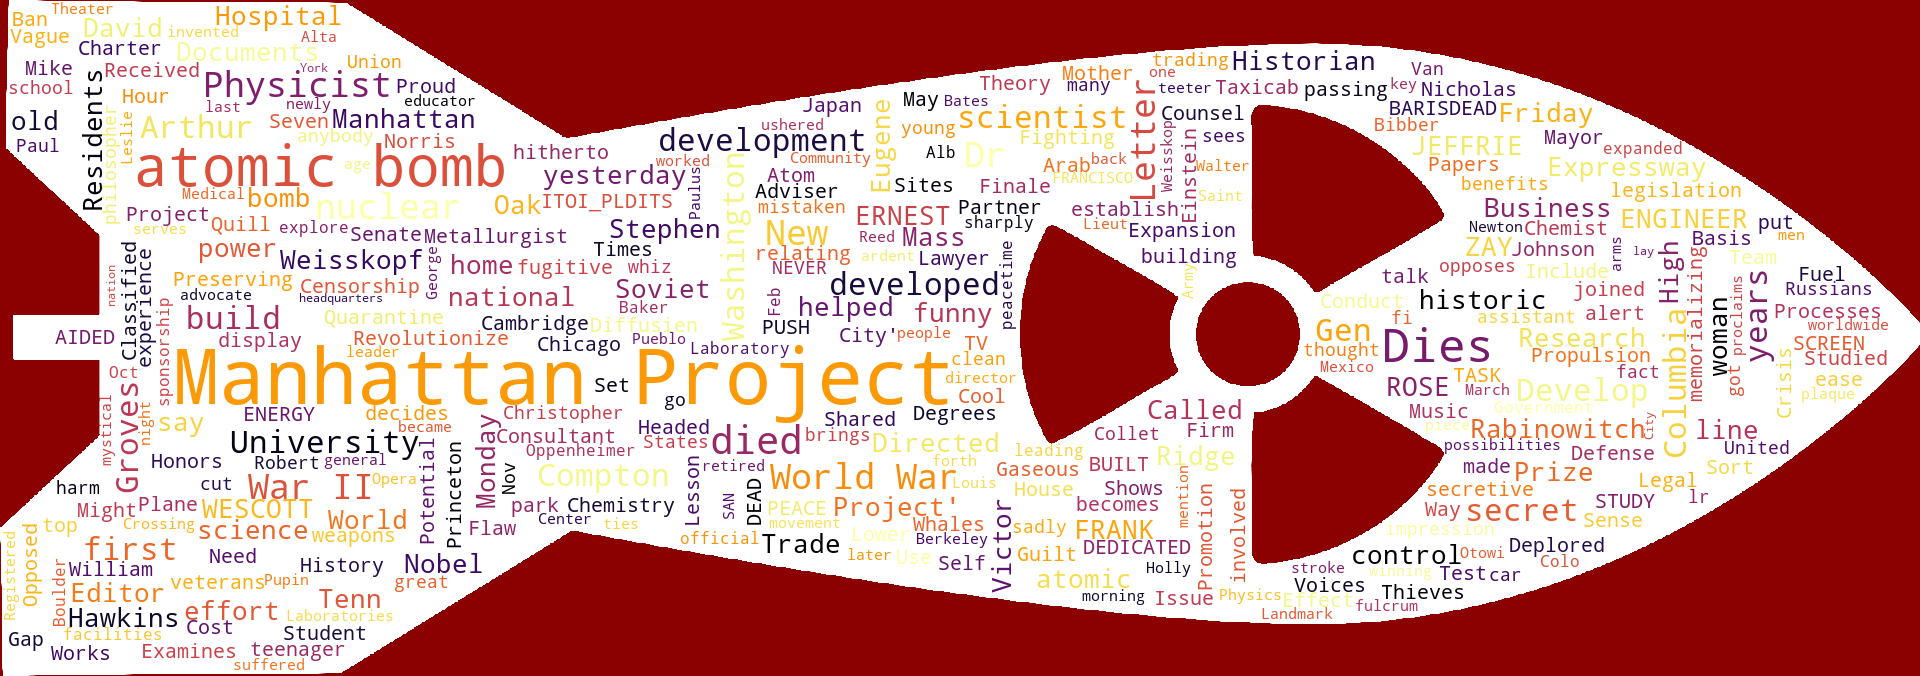

In [11]:
# manhattan project
reader_bomb = NYTReader(nyt_key)
reader_bomb.get_search_term(search='headline:("Manhattan Project")', 
                            article_limit=100,
                            verbose=True)

# get list of text sources
text_list = reader_bomb.build_list_from_sources(source_list=['headlines','snippets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/ABomb.png', transparency=True, rotate=270)

wa.make_wordcloud(text=text_list, image=image,
               filename="final images/bomb.png",
               colormap='inferno', background='darkred')

Request failed, only got 110 docs
Got 110 docs, from 1902-11-05T00:00:00Z to 2010-08-18T09:58:13Z


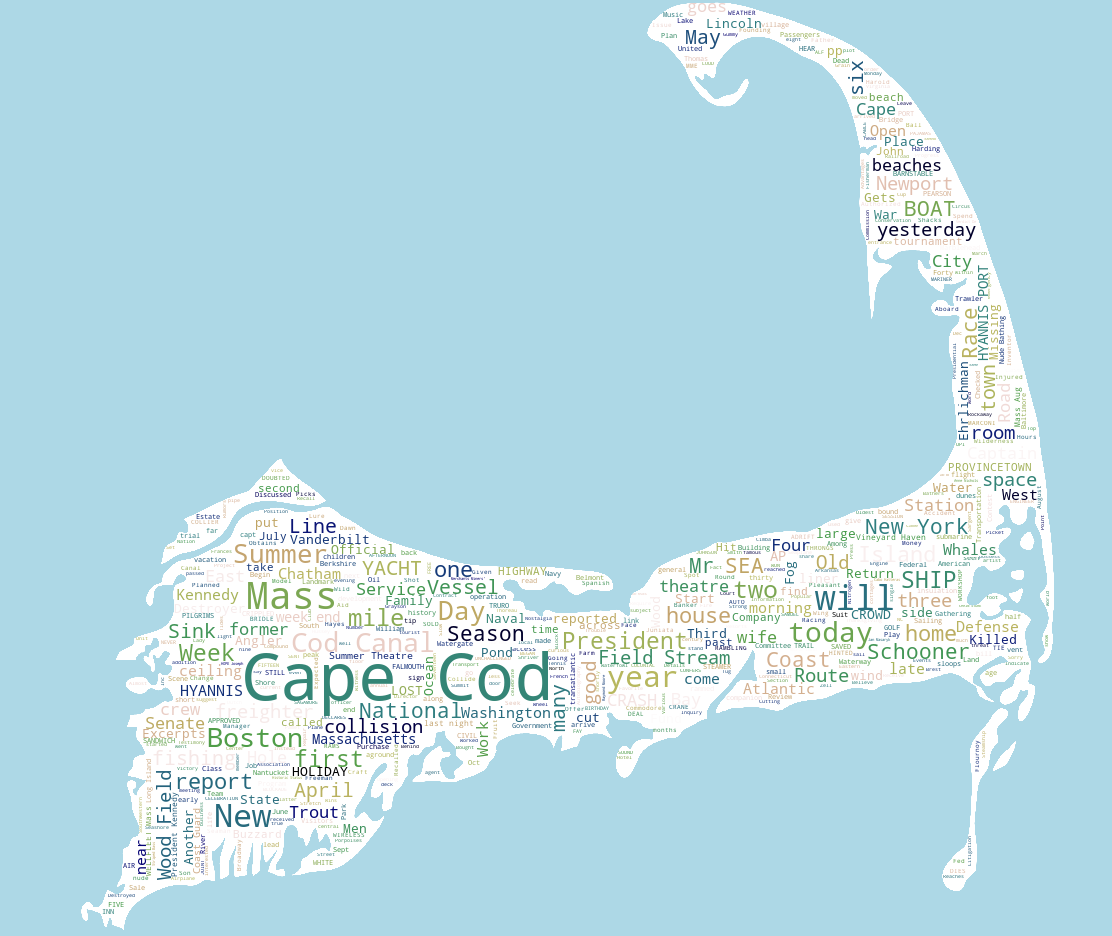

In [12]:
# cape cod
reader_cc = NYTReader(nyt_key)
reader_cc.get_search_term(search='headline:("Cape Cod")', 
                             begin_date='19010101',
                             article_limit=200,
                             verbose=True)

# get list of text sources
text_list = reader_cc.build_list_from_sources(source_list=['headlines','snippets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/capecod.PNG')

wa.make_wordcloud(text=text_list, image=image,
               filename="final images/capecod.png", 
               colormap='gist_earth', background='lightblue')

# Twitter

## Define authorization

In [13]:
%run words_api.py
%run words_visualization.py

In [14]:
auth = OAuth1(client_key=twitter_auth_dict['client_key'],
                client_secret=twitter_auth_dict['client_secret'],
                resource_owner_key=twitter_auth_dict['resource_owner_key'],
                resource_owner_secret=twitter_auth_dict['resource_owner_secret'])

## Get tweets

### By search term

In [15]:
reader_twitter = TwitterReader(auth)
reader_twitter.get_search_term(search='Oakland', tweet_limit=200, verbose=True, recent=True)

Got 200 tweets from 2018-05-27 06:13:00 to 2018-05-27 06:24:38, allowance now 167 requests


### By geolocation
Note this doesn't always work reliably, consider using the `get_recent_tweets()` method instead

In [16]:
reader_twitter.get_search_term(geo='37.817941,-122.352714,20mi', tweet_limit=200, verbose=True)

Got 200 tweets from 2018-05-27 06:23:44 to 2018-05-27 06:24:41, allowance now 165 requests


### Filter realtime tweets by location
Note these take a while to load so limits should be set lower

In [17]:
reader_twitter_rt = TwitterReader(auth)
reader_twitter_rt.get_recent_tweets(location_box='-122.75,36.8,-121.75,37.8', tweet_limit=10, verbose=True)

Got 10 tweets from 2018-05-27 06:25:02 to 2018-05-27 06:25:31, allowance now 165 requests


## Make wordcloud

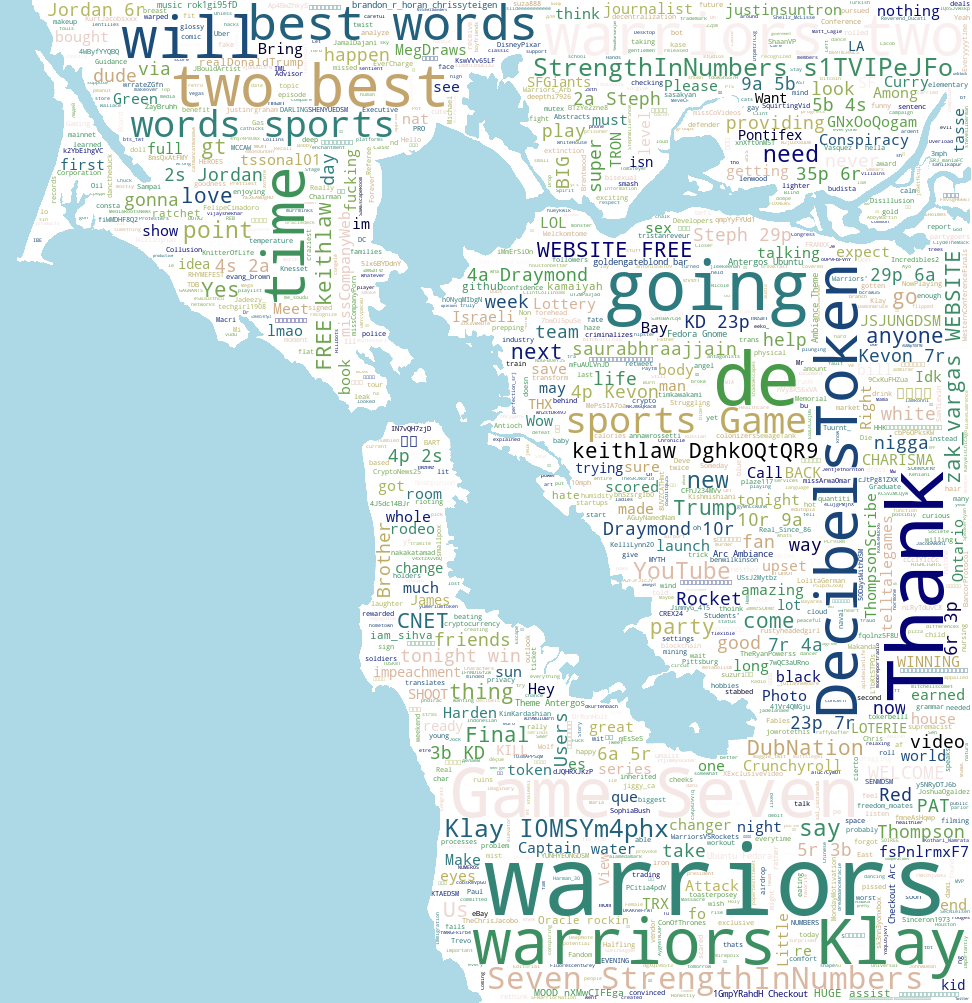

In [18]:
# get list of text sources
text_list = reader_twitter.build_list_from_sources(source_list=['tweets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/Location_Map_San_Francisco_Bay_Area_edited.gif')

wa.make_wordcloud(text=text_list, image=image,
               filename="final images/sf_bay_twitter.png", 
               colormap='gist_earth', background='lightblue',
               additional_stopwords=['https', 'co', 'amp', 'RT'], 
               reset_stopwords=False)


## Example twitter application: Utilities

Got 300 tweets from 2018-05-18 14:01:06 to 2018-05-27 03:29:14, allowance now 162 requests


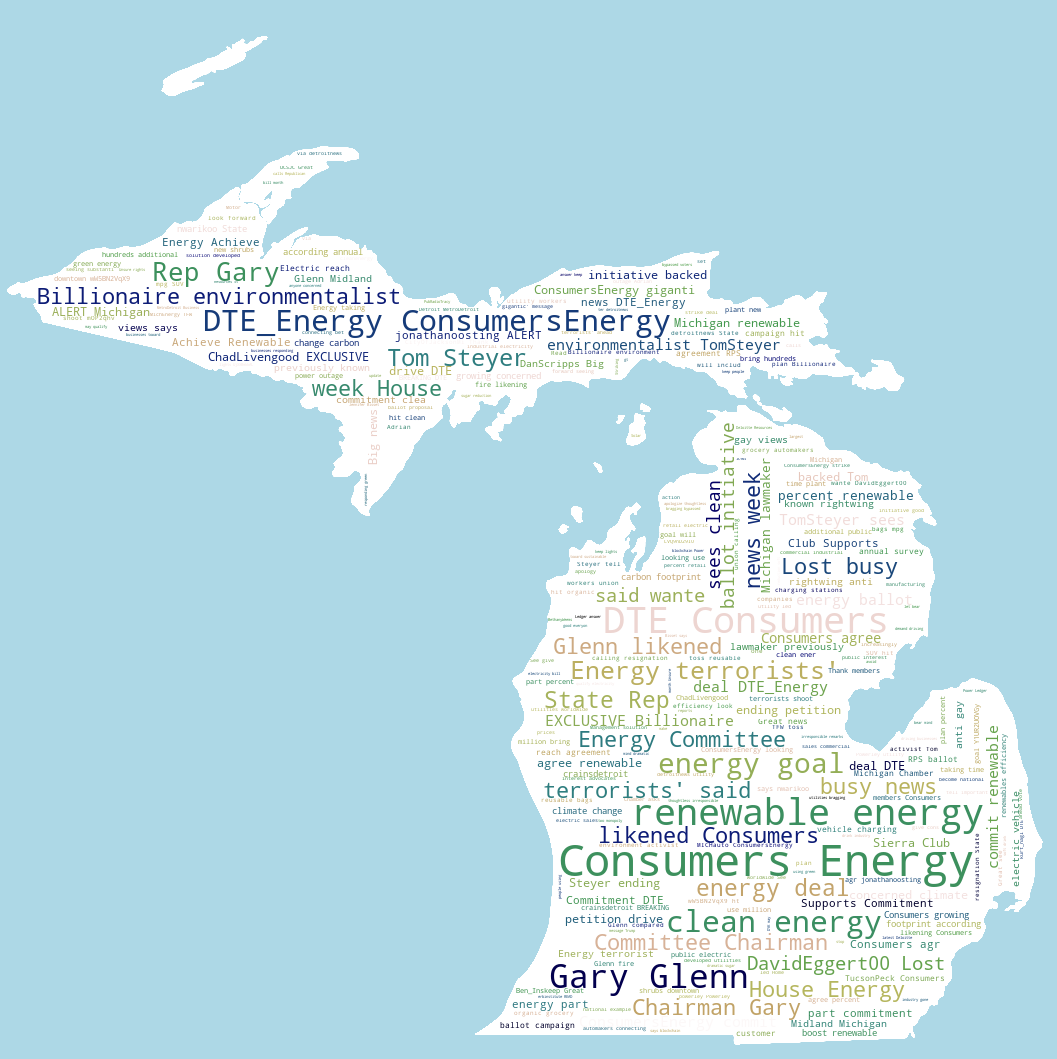

In [20]:
# renewable energy
reader_mi = TwitterReader(auth)
reader_mi.get_search_term(search=['Consumers Energy', 'ConsumersEnergy', 'CE', 'DTE'], 
                          geo='43.900689,-84.782134,300mi',
                          tweet_limit=300,
                          verbose=True)

# get list of text sources
text_list = reader_mi.build_list_from_sources(source_list=['tweets'])

# make image and wordcloud
wa= WordArt()
image = wa.create_mask_image('source images/Michigan.PNG')

wa.make_wordcloud(text=text_list, image=image,
                  filename="final images/utilities.png",
                  colormap='gist_earth', background='lightblue',
                  additional_stopwords=['https', 'co', 'amp', 'RT'])
